<a href="https://colab.research.google.com/github/dmburns1729/Class-Files/blob/main/Classification_Metrics_Exercise_2_(Practice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
#import seaborn to make a nice heatmap for our confusion matrix
import seaborn as sns

import matplotlib.pyplot as plt



#import some necessary tools
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#import accuracy, precision, recall, classification report, and confusion matrix scoring functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

#Importing the Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier



from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay,
                             PrecisionRecallDisplay, RocCurveDisplay,
                             f1_score, accuracy_score, classification_report)

In [ ]:
df = pd.read_csv('/content/bank_modified.csv')
df.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   duration             4521 non-null   int64
 3   campaign             4521 non-null   int64
 4   pdays                4521 non-null   int64
 5   previous             4521 non-null   int64
 6   job_blue-collar      4521 non-null   int64
 7   job_entrepreneur     4521 non-null   int64
 8   job_housemaid        4521 non-null   int64
 9   job_management       4521 non-null   int64
 10  job_retired          4521 non-null   int64
 11  job_self-employed    4521 non-null   int64
 12  job_services         4521 non-null   int64
 13  job_student          4521 non-null   int64
 14  job_technician       4521 non-null   int64
 15  job_unemployed       4521 non-null   int64
 16  job_unknown          452

In [ ]:
ml_df = df.copy()

In [ ]:
ml_df.isna().sum()

age                    0
balance                0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
y_yes                  0
dtype: int64

In [ ]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   duration             4521 non-null   int64
 3   campaign             4521 non-null   int64
 4   pdays                4521 non-null   int64
 5   previous             4521 non-null   int64
 6   job_blue-collar      4521 non-null   int64
 7   job_entrepreneur     4521 non-null   int64
 8   job_housemaid        4521 non-null   int64
 9   job_management       4521 non-null   int64
 10  job_retired          4521 non-null   int64
 11  job_self-employed    4521 non-null   int64
 12  job_services         4521 non-null   int64
 13  job_student          4521 non-null   int64
 14  job_technician       4521 non-null   int64
 15  job_unemployed       4521 non-null   int64
 16  job_unknown          452

In [ ]:
ml_df.duplicated().sum()

0

In [ ]:
ml_df['y_yes'].value_counts()

0    4000
1     521
Name: y_yes, dtype: int64

In [ ]:
# Imbalanced Classes!!

In [ ]:
X = ml_df.drop('y_yes', axis=1)
y = ml_df['y_yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

In [ ]:
#Create a DummyClassifier model using the 'most_frequent' strategy
dummy_classifier = DummyClassifier(random_state = 42)
dummy_classifier.fit(X_train, y_train)



DummyClassifier(random_state=42)

In [ ]:
def evaluate_classiffication(lgr_pipe, X_test, y_test, label="Test Data"):
  test_preds = lgr_pipe.predict(X_test)


   ## Print classification report for the test data (and make it pretty!)
  print('---'*20)
  print(f"[i] CLASSIFICATION REPORT FOR: {label}")
  print('---'*20)
  # print the classiffication report from the test data
  print(classification_report(y_test, test_preds))

  fig, axes = plt.subplots(1,2, figsize=(15,5));

  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
               normalize='true', cmap='Greens',
               ax = axes[0]);

  RocCurveDisplay.from_estimator(lgr_pipe, X_test, y_test, ax=axes[1])
  plt.show()

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       982
           1       0.00      0.00      0.00       149

    accuracy                           0.87      1131
   macro avg       0.43      0.50      0.46      1131
weighted avg       0.75      0.87      0.81      1131



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


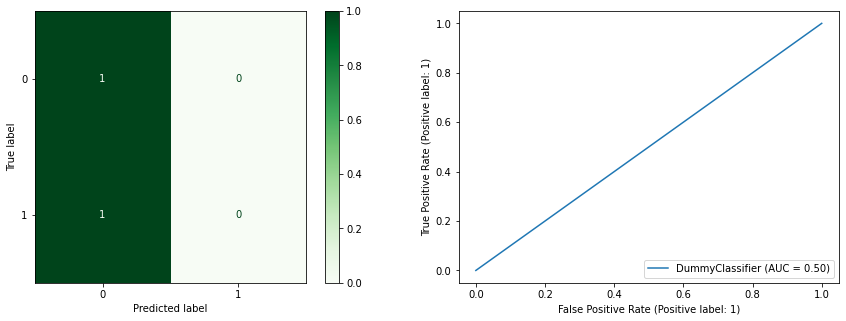

In [ ]:
evaluate_classiffication(dummy_classifier, X_test, y_test, label="Test Data")

In [ ]:
#Create a a logistic regression model

scaler = StandardScaler()
logreg = LogisticRegression()

# Put scaler and model in a pipeline
logreg_pipe = make_pipeline(scaler, logreg)

# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y
#logreg_pipe.fit(X_train, y_train)



In [ ]:
logreg_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression', LogisticRegression())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': None,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False}

In [ ]:


pipe_param_grid = {'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'logisticregression__penalty': ['l1', 'l2'],
              'logisticregression__max_iter': [1000]}

#c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

logreg_pipe_gs = GridSearchCV(logreg_pipe, param_grid)
logreg_pipe_gs.fit(X_train, y_train)













/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fil

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1,
                                                   10, 100, 1000],
                         'logisticregression__max_iter': [1000],
                         'logisticregression__penalty': ['l1', 'l2']})

In [ ]:
logreg_pipe_gs.best_params_


{'logisticregression__C': 0.1,
 'logisticregression__max_iter': 1000,
 'logisticregression__penalty': 'l2'}

In [ ]:
best_model = logreg_pipe_gs.best_estimator_

In [ ]:
#refit the model on the whole training set
best_model.fit(X_train, y_train)
#score the model on the test set
best_model.score(X_test, y_test)

0.8753315649867374

In [ ]:
# RandomizedSearchCV


pipe_param_grid = {'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'logisticregression__penalty': ['l1', 'l2'],
              'logisticregression__max_iter': [1000]}


logreg_pipe_rs = RandomizedSearchCV(logreg_pipe, pipe_param_grid)
logreg_pipe_rs.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fil

RandomizedSearchCV(estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('logisticregression',
                                              LogisticRegression())]),
                   param_distributions={'logisticregression__C': [0.0001, 0.001,
                                                                  0.01, 0.1, 1,
                                                                  10, 100,
                                                                  1000],
                                        'logisticregression__max_iter': [1000],
                                        'logisticregression__penalty': ['l1',
                                                                        'l2']})

In [ ]:
best_model = logreg_pipe_rs.best_estimator_

In [ ]:
#refit the model on the whole training set
best_model.fit(X_train, y_train)
#score the model on the test set
best_model.score(X_test, y_test)

0.8753315649867374

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       982
           1       0.59      0.17      0.27       149

    accuracy                           0.88      1131
   macro avg       0.74      0.58      0.60      1131
weighted avg       0.85      0.88      0.84      1131



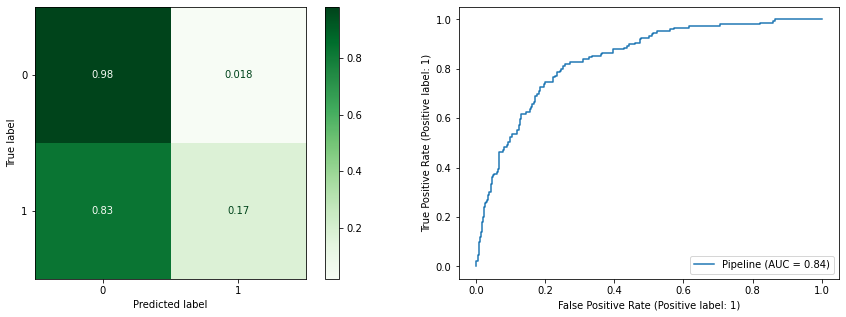

In [ ]:
evaluate_classiffication(best_model, X_test, y_test, label="Test Data")

In [ ]:
# Due to Imbalanced Classes we have an issue where the prediction is pretty poor.  We are trying to correctly identify the people who
# agree to the subscribe but the model is only really good at predicting who will say no!

# We need to balance the data!


In [ ]:
#Imports
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_sampler_pipeline
from imblearn.under_sampling import RandomUnderSampler

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       982
           1       0.36      0.72      0.48       149

    accuracy                           0.79      1131
   macro avg       0.65      0.76      0.68      1131
weighted avg       0.87      0.79      0.82      1131



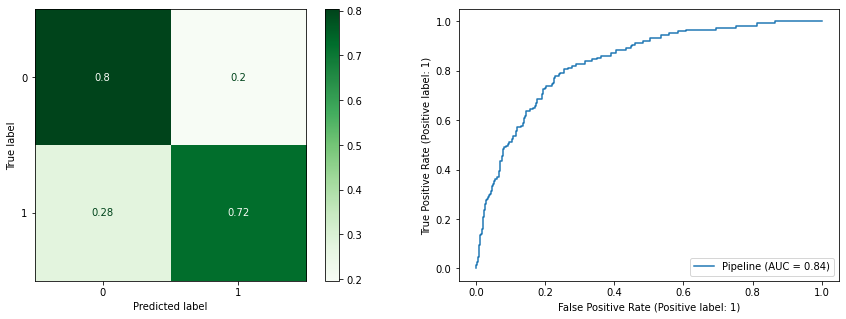

In [ ]:
#Create model pipeline with scaler, SMOTE, and model
smote = SMOTE()
log_reg_smote = LogisticRegression(max_iter=1000)
log_reg_smote_pipe = make_sampler_pipeline(scaler, smote, log_reg_smote)
#Fit and evaluate the model pipeline
log_reg_smote_pipe.fit(X_train, y_train)
test_preds = log_reg_smote_pipe.predict(X_test)
evaluate_classiffication(log_reg_smote_pipe, X_test, y_test, label="Test Data")

In [ ]:
# And just like that, we improved our predictions!!!

# Metrics calculated

We calculated Accuracy, Precision, Recall, ROC AUC, created a confusion matrix, and plotted the ROC for both classifications above.

#Questions

1)  My classificaiton with the Smote oversampler fit the best.  The bank is most interested in identifying the people who want to subscribe to a term deposit.  

2) The issue identified by comparing the baseline to the logistic is that the data is imbalanced with most people saying no

3) Balance the data!   Boom!  


